# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from scipy.stats import anderson, shapiro,kstest
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm

In [2]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.shape

(200, 4)

In [4]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [5]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<AxesSubplot:>

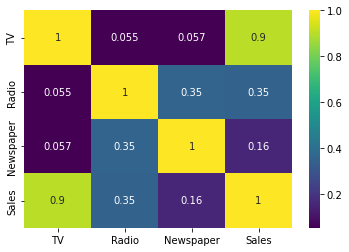

In [7]:
sns.heatmap(data = df.corr(), annot = True,cmap='viridis')

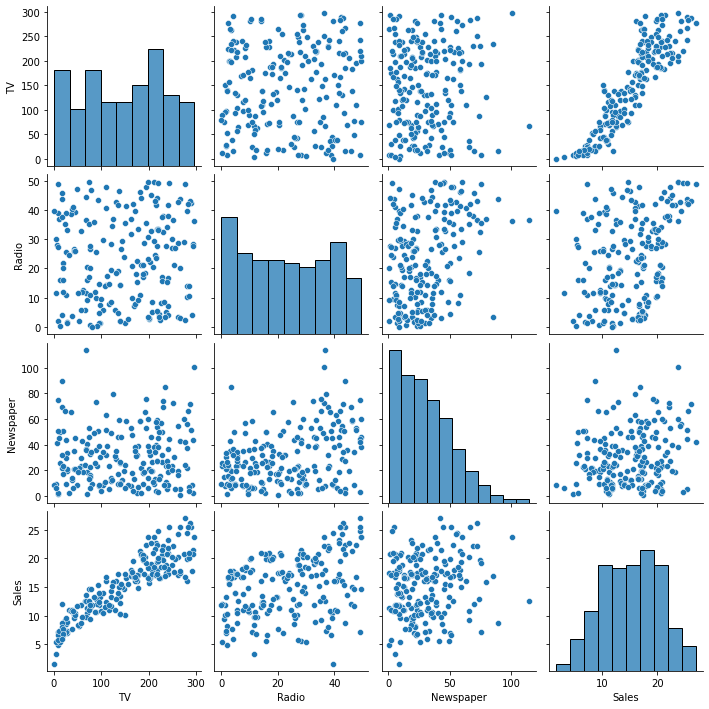

In [8]:
sns.pairplot(data=df)

<AxesSubplot:xlabel='Sales', ylabel='Density'>

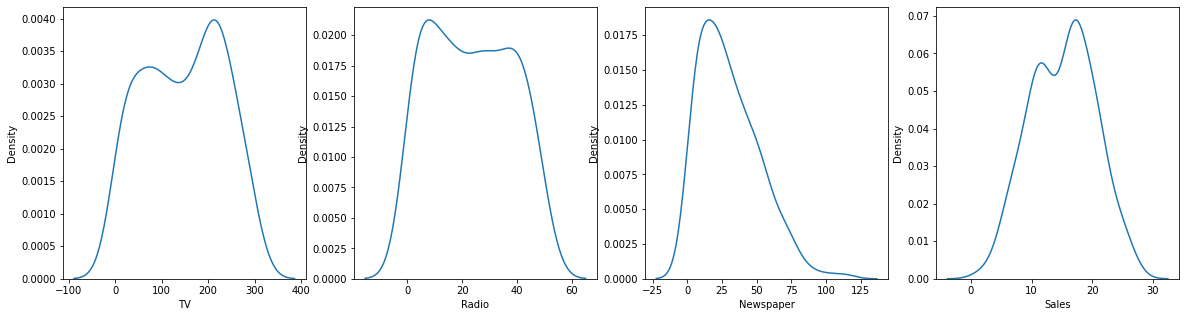

In [9]:
f,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(20,5))
sns.kdeplot(data=df,x="TV",ax=ax1)
sns.kdeplot(data=df,x="Radio",ax=ax2)
sns.kdeplot(data=df,x="Newspaper",ax=ax3)
sns.kdeplot(data=df,x="Sales",ax=ax4)

<AxesSubplot:xlabel='Sales'>

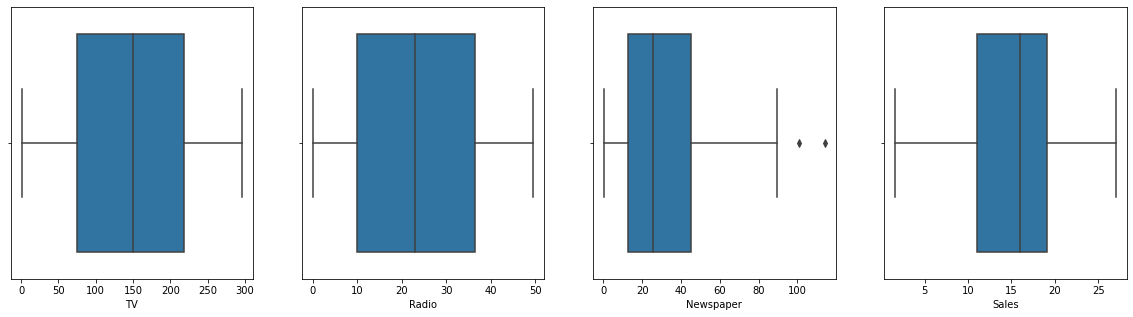

In [10]:
f,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(20,5))
sns.boxplot(data=df,x="TV",ax=ax1)
sns.boxplot(data=df,x="Radio",ax=ax2)
sns.boxplot(data=df,x="Newspaper",ax=ax3)
sns.boxplot(data=df,x="Sales",ax=ax4)

In [11]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [12]:
y = df["Sales"]

In [13]:
results = anderson(y)
tmp = pd.DataFrame(columns=["Statistic","Critical_value","Significance_level"])

In [14]:
tmp["Critical_value"] = results.critical_values
tmp["Significance_level"] = results.significance_level
tmp["Statistic"] = results.statistic
tmp["Significant"] = tmp["Statistic"] < tmp["Critical_value"]
tmp

,Statistic,Critical_value,Significance_level,Significant
0,0.866129,0.565,15.0,False
1,0.866129,0.644,10.0,False
2,0.866129,0.772,5.0,False
3,0.866129,0.901,2.5,True
4,0.866129,1.071,1.0,True


<AxesSubplot:xlabel='Sales', ylabel='Density'>

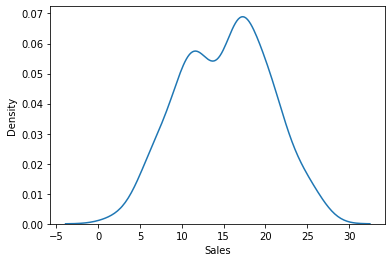

In [15]:
sns.kdeplot(y)

In [16]:
_,p = shapiro(y)
if p<0.05:
    print("Normally distributed")
else:
    print("Not Normally Distributed")

Not Normally Distributed


In [17]:
kstest(y,'norm')

KstestResult(statistic=0.9943128620620841, pvalue=0.0)

### Linearity check

In [18]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [19]:
def linearity_check(data=None,y = None):
    for i in data.columns:
        r,p = pearsonr(data[i],data[y])
        if p<0.05:
            print(f"{i} and y is significant {r}")
        else:
            print(f"{i} and y is not significant {r}")

In [20]:
linearity_check(data=df,y="Sales")

TV and y is significant 0.9012079133023309
Radio and y is significant 0.34963109700766926
Newspaper and y is significant 0.1579600261549263
Sales and y is significant 1.0


In [21]:
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(df.iloc[:,:-1].values,i) for i in range(df.iloc[:,:-1].shape[1])]

In [22]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [23]:
vif

,VIF
0,2.486772
1,3.285462
2,3.055245


In [24]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


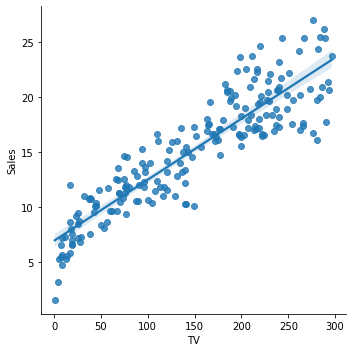

In [25]:
sns.lmplot(x = "TV",y = "Sales",data=df)

In [26]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [27]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [28]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=28)

In [29]:
xtrain.shape,xtest.shape

((140, 3), (60, 3))

In [30]:
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [31]:
model.coef_

array([0.05399323, 0.10086485, 0.00510244])

In [32]:
model.intercept_

4.645386974324467

In [33]:
ytrain.values

array([ 9.5, 17.4,  8.7, 11. , 22.6, 19. , 10.9, 11.9, 15.2, 20.1, 20.9,
       17.8, 20.2,  8.5, 14.6, 16.7, 16. , 16.6, 20.5,  5.3,  9.4, 11. ,
       15.6, 20.9, 17.1, 16. , 25.4,  5.5, 19.7,  9.6, 10.3, 27. , 12.6,
       21.7, 17.3, 14.2, 10.6, 20.7, 19.8, 14. , 21.4, 12.5, 20.9,  7.6,
       17.4, 17. , 16.5, 17.2, 10.1, 13.2, 17.9, 18.4, 14.7, 16.6, 15. ,
       11.3, 22.2, 23.8, 21.5,  7. , 14.6, 20.2, 20.7, 19.4, 16.8, 11.9,
       10.1, 12.9, 12. , 11.8,  7.3, 19.7, 23.7, 15.5, 18. , 10.5, 26.2,
        7.2, 16.9, 12.3, 17.1, 10.1, 12.4, 13.3, 20.7, 13.6,  8.8, 10.8,
       22.6, 25.5, 11.9,  7.3, 19.8, 12. , 10.6, 12. ,  5.7, 17. ,  1.6,
       12.6, 24.4, 10.3, 18.4, 23.8, 11.8, 12.2,  6.7, 16.4, 20.5, 19.6,
       17.6, 17.9, 15. , 10.4, 19.8, 18.9, 20.7, 18.9, 16.9, 19.9,  8.1,
       16.1, 15.9,  9.7, 13.2, 17.5, 11.5, 16.6,  4.8,  9.2, 11.6, 17.6,
        5.9, 10.9, 16. , 16.5, 13.2,  5.6,  7.2, 10.4])

In [34]:
ypred = model.predict(xtrain)

In [35]:
error = ytrain.values - ypred
error

array([-5.08795428e-01, -1.27889903e+00,  2.93721561e-01, -8.03127032e-01,
        1.86235780e+00, -2.18570435e-01,  7.72979068e-02,  2.05816935e+00,
        3.54852690e-01,  7.01094055e-03,  2.80522058e+00, -2.99813477e+00,
        2.93197801e+00, -3.13779244e-01,  8.35833517e-01, -6.41301054e-01,
       -1.88375146e-01, -4.61543580e-01,  1.68965936e+00, -2.23666637e-01,
        4.73322480e-01,  2.16132569e+00, -2.03654109e-01,  1.48955030e+00,
        1.40243845e+00, -2.09112331e+00,  1.90042804e+00, -2.58508080e+00,
       -9.73368286e-01, -8.40953675e-02, -2.22498325e+00,  2.25831526e+00,
        1.00553357e-01,  1.01740800e+00, -8.94788772e-01,  1.01326275e-01,
       -6.92985589e-02,  1.43133197e+00,  1.03907544e+00,  3.73288349e+00,
       -2.13490388e+00, -7.94593708e-02, -6.08350419e-01,  4.48458136e-01,
       -3.60481587e+00, -1.71565894e+00, -5.63263168e-01,  7.65329081e-01,
        2.55317816e-01, -8.20570143e-01,  1.10144516e+00,  4.47562715e-01,
        8.05413883e-01, -

<AxesSubplot:ylabel='Density'>

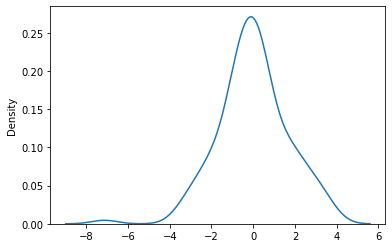

In [36]:
sns.kdeplot(error)

In [37]:
kstest(error,'norm')

KstestResult(statistic=0.12675067754173563, pvalue=0.020259899188501018)

In [38]:
xtrain1 = sm.add_constant(xtrain)
model = sm.OLS(ytrain,xtrain1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     398.7
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           3.61e-67
Time:                        10:31:01   Log-Likelihood:                -269.97
No. Observations:                 140   AIC:                             547.9
Df Residuals:                     136   BIC:                             559.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6454      0.380     12.236      0.000       3.895       5.396
TV             0.0540      0.002     32.512      0.000       0.051       0.057
Radio          0.1009      0.010      9.737      0.000       0.080       0.121
Newspaper      0.0051      0.007      0.731      0.466      -0.009       0.019
==============================================================================
Omnibus:                       10.701   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               17.571
Skew:                          -0.352   Prob(JB):                     0.000153
Kurtosis:                       4.586   Cond. No.                         459.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\HP\anaconda3\envs\ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

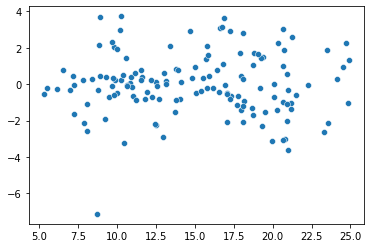

In [39]:
sns.scatterplot(ypred,error)

In [40]:
ypred = model.predict(xtest)
np.sqrt(mean_squared_error(ytest,ypred))

ValueError: shapes (60,3) and (4,) not aligned: 3 (dim 1) != 4 (dim 0)

In [ ]:
ypred = model.predict(xtrain)
np.sqrt(mean_squared_error(ytrain,ypred))

1.6643011435668784

In [ ]:
model.score(xtrain,ytrain)

0.8979164434420984

In [ ]:
model.score(xtest,ytest)

0.91024197212397